### Reconstruction with application temperature parameters to scores

In [107]:
# Ensure necessary packages are installed
!pip install cobra efmtool numpy pandas scipy

COBRApy definition of the DFKI toy network

In [3]:
import cobra
from cobra import Model, Reaction, Metabolite

# Modell erstellen
model = Model('Toy_Model')

# Metaboliten erstellen
A_EX = Metabolite('A_EX', compartment='e')
A = Metabolite('A', compartment='c')
B = Metabolite('B', compartment='c')
D = Metabolite('D', compartment='c')
E = Metabolite('E', compartment='c')
E_EX = Metabolite('E_EX', compartment='e')
F = Metabolite('F', compartment='c')
G = Metabolite('G', compartment='c')
H = Metabolite('H', compartment='c')
I = Metabolite('I', compartment='c')
J = Metabolite('J', compartment='c')
K = Metabolite('K', compartment='c')
L = Metabolite('L', compartment='c')
L_EX = Metabolite('L_EX', compartment='e')
M = Metabolite('M', compartment='c')
M_EX = Metabolite('M_EX', compartment='e')
N = Metabolite('N', compartment='c')
N_EX = Metabolite('N_EX', compartment='e')
O = Metabolite('O', compartment='c')
P = Metabolite('P', compartment='c')
P_EX = Metabolite('P_EX', compartment='e')

# Reaktionen erstellen
a_in = Reaction('A_in')
a_in.name = 'A_EX to A'
a_in.add_metabolites({A_EX: -1, A: 1})

reaction1 = Reaction('R1')
reaction1.name = 'A and G to B'
reaction1.add_metabolites({A: -1, G: -1, B: 1})

reaction2 = Reaction('R2')
reaction2.name = 'B to D'
reaction2.add_metabolites({B: -1, D: 1})

reaction3 = Reaction('R3')
reaction3.name = 'D to E and F'
reaction3.add_metabolites({D: -1, E: 1, F: 1})

reaction4 = Reaction('R4')
reaction4.name = 'B to I'
reaction4.add_metabolites({B: -1, I: 1})
reaction4.lower_bound= -1000.0

reaction5 = Reaction('R5')
reaction5.name = 'I to M and J'
reaction5.add_metabolites({I: -1, M: 1, J: 1})
reaction5.lower_bound= -1000.0

reaction6 = Reaction('R6')
reaction6.name = 'O to P and J'
reaction6.add_metabolites({O: -1, J: 1, P: 1})
reaction6.lower_bound= -1000.0

reaction7 = Reaction('R7')
reaction7.name = 'H to K and L'
reaction7.add_metabolites({H: -1, K: 1, L: 1})
reaction7.lower_bound= -1000.0

reaction8 = Reaction('R8')
reaction8.name = 'K and M to N'
reaction8.add_metabolites({K: -1, M: -1, N: 1})

reaction9 = Reaction('R9')
reaction9.name = 'A and J to I'
reaction9.add_metabolites({A: -1, J: -1, I: 1})
reaction9.lower_bound= -1000.0

reaction10 = Reaction('R10')
reaction10.name = 'F to G'
reaction10.add_metabolites({F: -1, G: 1})

reaction11 = Reaction('R11')
reaction11.name = 'E to H'
reaction11.add_metabolites({E: -1, H: 1})
reaction11.lower_bound= -1000.0

reaction12 = Reaction('R12')
reaction12.name = 'I to P'
reaction12.add_metabolites({I: -1, P: 1})
reaction12.lower_bound= -1000.0

reaction13 = Reaction('R13')
reaction13.name = 'O to M and L'
reaction13.add_metabolites({O: -1, M: 1, L: 1})
reaction13.lower_bound= -1000.0

reaction14 = Reaction('R14')
reaction14.name = 'P to K'
reaction14.add_metabolites({P: -1, K: 1})
reaction14.lower_bound= -1000.0


E_EX_out = Reaction('E_EX_out')
E_EX_out.name = 'E to E_EX'
E_EX_out.add_metabolites({E: -1, E_EX: 1})

L_EX_out = Reaction('L_EX_out')
L_EX_out.name = 'L to L_EX'
L_EX_out.add_metabolites({L: -1, L_EX: 1})

M_EX_out = Reaction('M_EX_out')
M_EX_out.name = 'M to M_EX'
M_EX_out.add_metabolites({M: -1, M_EX: 1})

N_EX_out = Reaction('N_EX_out')
N_EX_out.name = 'N to N_EX'
N_EX_out.add_metabolites({N: -1, N_EX: 1})

P_EX_out = Reaction('P_EX_out')
P_EX_out.name = 'P to P_EX'
P_EX_out.add_metabolites({P: -1, P_EX: 1})

# Reaktionen zum Modell hinzufügen
model.add_reactions([a_in, reaction1, reaction2, reaction3, reaction4, reaction5, 
                     reaction6, reaction7, reaction8, reaction9, reaction10,
                     reaction11, reaction12, reaction13, reaction14, E_EX_out, L_EX_out, M_EX_out, N_EX_out, P_EX_out])

# Exchange Reaktionen für extracelluläre Metaboliten
#model.add_boundary(A_EX, type="exchange")
#model.add_boundary(E_EX, type="exchange")
#model.add_boundary(L_EX, type="exchange")
#model.add_boundary(M_EX, type="exchange")
#model.add_boundary(N_EX, type="exchange")
#model.add_boundary(P_EX, type="exchange")

# Modellinformationen ausgeben
print("Reaktionen im Modell:", len(model.reactions))
print("Metaboliten im Modell:", len(model.metabolites))
print("Gene im Modell:", len(model.genes))


Reaktionen im Modell: 20
Metaboliten im Modell: 21
Gene im Modell: 0


In [4]:
import numpy as np
import cobra


def get_stoichiometric_matrix(model):
    # Filtere die Reaktionen, um nur Reaktionen zu behalten, die nicht mit "EX_" beginnen, also keine CobraPy-Exchange Reaktionen falls vorhanden
    internal_reactions = [rxn for rxn in model.reactions if not rxn.id.startswith("EX_")]

    # Extrahiere die Metaboliten aus dem Modell
    internal_metabolites = [meta for meta in model.metabolites if not meta.compartment == 'e']

    # Erstelle die leere Stöchiometrie-Matrix mit (Anzahl der Metaboliten, Anzahl der internen Reaktionen)
    stoichiometric_matrix = np.zeros((len(internal_metabolites), len(internal_reactions)))

    # Befülle die Stöchiometrie-Matrix so, dass jede Spalte eine Reaktion repräsentiert
    for j, rxn in enumerate(internal_reactions):  # Spaltenweise über Reaktionen iterieren
        for i, met in enumerate(internal_metabolites):  # Zeilenweise über Metaboliten iterieren
            stoichiometric_matrix[i, j] = rxn.metabolites.get(met, 0)  # Falls Metabolit nicht in der Reaktion ist, wird 0 zurückgegeben
    return stoichiometric_matrix

Generate the datapoints using the Elementary FLux Modes. 
These will be called "experimental_data_zeropadded_out" from here on.

In [6]:
# Liste der experimentellen Datenpunkten (Elementarmoden) mit eingefügten 0 für Produkte, die nicht erzeugt werden.
experimental_data_zeropadded_out = [
    {'A_in':1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0},
    {'A_in':1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}
]

Create synthetic datapoint using sampling.

In [7]:
import cobra
from cobra.sampling import sample

import pandas as pd


# Function to normalize a row based on A_in, excluding boundary reactions
def normalize_row(row, normalization_id):
    normalization_factor = row[normalization_id]
    # Exclude boundary reactions (columns starting with "EX_" or ending with "_out")
    filtered_row = {col: value for col, value in row.items() if (col.endswith("_in") or col.endswith("_out"))}
    return {col: (value / normalization_factor) if normalization_factor != 0 else 0.0
            for col, value in filtered_row.items()}


def create_synthetic_datapoints(model, amount, normalization_id):
    s = sample(model, amount)
    
    normalized_data = [normalize_row(row, normalization_id) for _, row in s.iterrows()]
    
    return normalized_data

For the sampling, exchange reactions have to be declared in CobraPy

In [8]:
model_data_gen = model.copy()

# Exchange Reaktionen für extracelluläre Metaboliten
model_data_gen.add_boundary(A_EX, type="exchange")
model_data_gen.add_boundary(E_EX, type="exchange")
model_data_gen.add_boundary(L_EX, type="exchange")
model_data_gen.add_boundary(M_EX, type="exchange")
model_data_gen.add_boundary(N_EX, type="exchange")
model_data_gen.add_boundary(P_EX, type="exchange")

Reaction identifier,EX_P_EX
Name,exchange
Memory address,0x112571690
Stoichiometry,P_EX <=> <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [9]:
import random
import numpy as np

In [10]:
random.seed(42)
np.random.seed(42)

In [11]:
synth_data42 = create_synthetic_datapoints(model_data_gen, 20, "A_in")

print(synth_data42)

[{'A_in': 1.0, 'E_EX_out': 0.37006958948385554, 'L_EX_out': 0.209884256281456, 'M_EX_out': 0.10555185280925759, 'N_EX_out': 0.1165456633841747, 'P_EX_out': 0.29128723093853903}, {'A_in': 1.0, 'E_EX_out': 0.5170878119938481, 'L_EX_out': 0.10679634790756883, 'M_EX_out': 0.1927862324003474, 'N_EX_out': 0.07133424302328521, 'P_EX_out': 0.1474574695592351}, {'A_in': 1.0, 'E_EX_out': 0.12269720154034794, 'L_EX_out': 0.7104001521592744, 'M_EX_out': 0.19705530052599463, 'N_EX_out': 0.186567531998218, 'P_EX_out': 0.3071124339372181}, {'A_in': 1.0, 'E_EX_out': 0.2553118768166713, 'L_EX_out': 0.2440167849134067, 'M_EX_out': 0.2524574902994757, 'N_EX_out': 0.12938735007846586, 'P_EX_out': 0.23345593272691412}, {'A_in': 1.0, 'E_EX_out': 0.29174107122545, 'L_EX_out': 0.41525171595889737, 'M_EX_out': 0.18078941728208878, 'N_EX_out': 0.10011072039634805, 'P_EX_out': 0.32724807069976247}, {'A_in': 1.0, 'E_EX_out': 0.17449339542858358, 'L_EX_out': 0.5690511007830835, 'M_EX_out': 0.03922843457024264, 'N_

In [12]:
random.seed(17)
np.random.seed(17)

In [13]:
synth_data17 = create_synthetic_datapoints(model_data_gen, 20, "A_in")

print(synth_data17)

[{'A_in': 1.0, 'E_EX_out': 0.4781667181581512, 'L_EX_out': 1.0450238925732211, 'M_EX_out': 0.03601598693093696, 'N_EX_out': 0.02759712948853081, 'P_EX_out': 0.4306230359338517}, {'A_in': 1.0, 'E_EX_out': 0.42219634641238596, 'L_EX_out': 0.35403159505356113, 'M_EX_out': 0.3489562437833416, 'N_EX_out': 0.03013768021025196, 'P_EX_out': 0.16857204938376905}, {'A_in': 1.0, 'E_EX_out': 0.1075442669305294, 'L_EX_out': 0.8350800271136045, 'M_EX_out': 0.7915799770711184, 'N_EX_out': 0.009207710520798044, 'P_EX_out': 0.08246033495675775}, {'A_in': 1.0, 'E_EX_out': 0.35452113524450884, 'L_EX_out': 0.30473794382342506, 'M_EX_out': 0.17142650577595345, 'N_EX_out': 0.13314661621581522, 'P_EX_out': 0.20775912654790937}, {'A_in': 1.0, 'E_EX_out': 0.399592682804619, 'L_EX_out': 0.15761706537672, 'M_EX_out': 0.007545184080962466, 'N_EX_out': 0.05049629745871988, 'P_EX_out': 0.49186953819698154}, {'A_in': 1.0, 'E_EX_out': 0.18403225697014552, 'L_EX_out': 1.1567903450226162, 'M_EX_out': 0.6265022646853019

Function to calculate scoring using Least Square Minimization.

Computes the sum of the distances of the closest solutions for each data datapoint. 

Return the Fit-score.

In [67]:
import numpy as np
from scipy.optimize import lsq_linear
from scipy.optimize import minimize





#print(reaction_ids)
# Funktion zur Ableitung des Zielvektors aus den experimentellen Daten
def create_target_vector(data_point, reaction_ids):
    target_flux = np.full(len(reaction_ids), np.nan)  # Vektor mit NaN initialisieren
    for rxn_id, value in data_point.items():
        if rxn_id in reaction_ids:  # Nur Reaktionen, die im Modell existieren
            idx = reaction_ids.index(rxn_id)
            target_flux[idx] = value  # Setze den Zielwert
    return target_flux


def least_square_min(model, S, experimental_data):
    reaction_ids = [rxn.id for rxn in model.reactions if not rxn.id.startswith("EX_")]
    total_score = 0.0
    successful_optimizations = 0

    for data_point in experimental_data:
        # Zielvektor für aktuellen Datenpunkt erstellen
        target_flux = create_target_vector(data_point, reaction_ids)

        # Filter für bekannte Flüsse (Reaktionen, die in 'target_flux' nicht NaN sind)
        known_flux_indices = ~np.isnan(target_flux)
        target_flux_values = target_flux[known_flux_indices]

        def objective(x):
            return np.linalg.norm(x[known_flux_indices] - target_flux_values)

        constraints = {'type': 'eq', 'fun': lambda x: np.dot(S, x)}

        initial_guess = np.zeros(len(reaction_ids))
        bounds = [(model.reactions.get_by_id(rxn_id).lower_bound,
                   model.reactions.get_by_id(rxn_id).upper_bound)
                  for rxn_id in reaction_ids]

        result = minimize(objective, initial_guess, constraints=constraints, bounds=bounds, tol=1e-10)

        if result.success:
            optimized_flux = result.x
            total_score += np.linalg.norm(optimized_flux[known_flux_indices] - target_flux_values)
            successful_optimizations += 1
        #else:
            #print(f"Optimization failed for data point: {data_point}. Message: {result.message}")

    # Return None if any optimization failed, otherwise the total score
    if successful_optimizations < len(experimental_data):
        return 0.0, len(experimental_data)
    else:
        return total_score, len(experimental_data)

 

S = get_stoichiometric_matrix(model)
print(least_square_min(model, S, experimental_data_zeropadded_out))

(7.084858411749409e-08, 11)


Function to generate random reactions using the internal metabolites of a model.

In [81]:
import random
from cobra import Reaction

# Erstellen von Reaktionen mit 1-2 Substrat(en) und 1-2 Produkt(en)
def generate_random_reactions(model, num_reactions=2000):
    # Filter out metabolites that end with '_EX'
    metabolites = [met for met in model.metabolites if not met.compartment == 'e']
    random_reactions = []

    for i in range(num_reactions):
        reaction_valid = False

        while not reaction_valid:
            # Zufällige Auswahl der Anzahl an Substraten und Produkten
            num_reactants = random.randint(1, 2)
            num_products = random.randint(1, 2)

            # Zufällige Auswahl der Substrate und Produkte
            reactants = random.sample(metabolites, num_reactants)
            products = random.sample(metabolites, num_products)

            # Check, dass auf beiden Seiten Metaboliten vorhanden sind
            if set(reactants).isdisjoint(set(products)):
                reaction_valid = True

                # Erstellung der Reaktion
                reaction = Reaction(f'Random_Rxn_{i+1}')
                reaction.name = f'Random Reaction {i+1}'

                reaction.add_metabolites({
                    met: -1.0 for met in reactants
                })
                reaction.add_metabolites({
                    met: 1.0 for met in products
                })

                # 50% Chance, die Reaktion reversibel zu machen
                if random.random() < 0.5:
                    reaction.lower_bound = -1000.0
                else:
                    reaction.lower_bound = 0.0

                reaction.upper_bound = 1000.0

                random_reactions.append(reaction)

    return random_reactions

# Generierung von 2000 zufälligen Reaktionen + den Inversen
random_reactions_list = generate_random_reactions(model, num_reactions=2000)

# Anzahl der insgesamt generierten Reaktionen
print(f"\nTotal number of random reactions generated: {len(random_reactions_list)}")


Total number of random reactions generated: 2000


Functions to sample reactions either from a model or from a list of reactions.

In [37]:
import cobra
import random

def sample_reactions(model, n_reactions):
    
    # Filter reactions that do not end with '_in' or '_out'
    valid_reactions = [rxn for rxn in model.reactions if not rxn.id.endswith('_in') and not rxn.id.endswith('_out')]

    # Ensure that the model has enough valid reactions
    if n_reactions > len(valid_reactions):
        raise ValueError("Requested number of reactions exceeds the total number of valid reactions in the model")

    # Sample reactions randomly from the valid reactions list
    sampled_reactions = random.sample(valid_reactions, n_reactions)

    for rxn in sampled_reactions:
        print(rxn.id)
    
    return sampled_reactions


In [38]:
import random

def sample_reactions_from_list(reactions_list, n_reactions):
   
    # Ensure the list has enough reactions to sample from
    if n_reactions > len(reactions_list):
        raise ValueError("Requested number of reactions exceeds the total number of reactions in the list")

    # Sample reactions randomly from the given list
    sampled_reactions = random.sample(reactions_list, n_reactions)

    for rxn in sampled_reactions:
        print(rxn.id if hasattr(rxn, 'id') else rxn)  # Print the ID if the object has one

    return sampled_reactions


Function to compute Edit distance between to models.

For instance the symmetric difference of the sets of reactions of two models.

In [13]:
def model_edit_distance(model1, model2):
    
    # Get sets of reaction IDs for both models
    reactions_model1 = {rxn.id for rxn in model1.reactions}
    reactions_model2 = {rxn.id for rxn in model2.reactions}
    
    # Calculate the symmetric difference (reactions present in one model but not the other)
    differing_reactions = reactions_model1.symmetric_difference(reactions_model2)
    
    # The edit distance is the number of differing reactions
    edit_distance = len(differing_reactions)
    
    return edit_distance


## Creating a scoring function that takes distance to input model into account

In [26]:
def score_combined(input_model, curr_model, S, experimental_data):
    model_score = model_edit_distance(input_model, curr_model)
    fit_score, num_evals = least_square_min(curr_model, S, experimental_data)
    if fit_score == 0.0:
        return None, None, num_evals
    score = (1 + fit_score) * model_score
    return score, fit_score, num_evals

## Evaluating the iterative addition of reaction after evaluating using a temperature parameter to create a probability distribution for the selection of reaction additions

In [42]:
# Temperature-softmax adjustment function
def temperature_softmax(scores, temperature=1.0):
    
    exp_scores = np.exp(np.array(scores) / temperature)
    return exp_scores / exp_scores.sum()

# Reaction selection function
def select_reaction(reactions, probabilities):
    
    return np.random.choice(reactions, p=probabilities)

In [84]:
# Reconstruction workflow
def reconstruct_model(input_model, original_model, reaction_list, experimental_data, threshold=3e-7, temperature=1.0):
    
    # Calculate Model Score for original model
    S = get_stoichiometric_matrix(original_model)
    original_score, _, _ = score_combined(input_model, original_model, S, experimental_data)

    print(original_score)
    
    # History to store reconstruction process
    history = []

    # Current model starts as input_model
    curr_model = input_model.copy()
    num_evals_total = 0
    while True:
        # Step 1: Compute scores for each reaction
        scores = []
        valid_reactions = []
        for reaction in reaction_list:
            test_model = curr_model.copy()
            test_model.add_reactions([reaction])
            S = get_stoichiometric_matrix(test_model)
            score, fit_score, num_evals = score_combined(input_model, test_model, S, experimental_data)
            if score is not None:
                scores.append(score)
                valid_reactions.append(reaction)
            num_evals_total += num_evals
        #print(scores)
        # Step 2: Flip scores such that lower scores have higher probabilities
        flipped_scores = [-np.log(score + 1e-10) for score in scores]
        
        # Step 3: Apply temperature adjustment
        probabilities = temperature_softmax(flipped_scores, temperature)
        #print(probabilities)
        # Step 4: Check if valid_reactions is empty
        if not valid_reactions:
            print("No valid reactions to consider. Stopping reconstruction.")
            return None, None, None

        # Select a reaction based on probabilities
        selected_reaction = select_reaction(valid_reactions, probabilities)
        print(valid_reactions.index(selected_reaction))
        # Add the selected reaction to the model
        curr_model.add_reactions([selected_reaction])

        # Remove the reaction from the list
        reaction_list.remove(selected_reaction)

        # Compute the score after addition
        S = get_stoichiometric_matrix(curr_model)
        final_score, fit_score, num_evals = score_combined(input_model, curr_model, S, experimental_data)
        num_evals_total += num_evals

        # Record the history
        history.append({
            "reaction": selected_reaction.id,
            "final_score": final_score,
            "fit_score": fit_score,
            "num_evals": num_evals_total
        })

        # Check stopping condition
        if fit_score < threshold and fit_score != 0.0:
            print("Threshold reached. Reconstruction complete.")
            break
    
    
    
    return curr_model, history, original_score

In [54]:
def reduce_model_random(test_model, sampling_size):
    model = test_model.copy()
    reactions_to_remove = sample_reactions(model, sampling_size)
    removed_reactions = [model.reactions.get_by_id(reaction.id) for reaction in reactions_to_remove]
    model.remove_reactions(reactions_to_remove)
    random_reactions = generate_random_reactions(model, 50)
    random_reactions.extend(removed_reactions)
    return model, random_reactions

In [48]:
original_model = model.copy()
input_model, reaction_list = reduce_model_random(original_model, 2) # Input model with missing reactions

print(reaction_list)
S = get_stoichiometric_matrix(input_model)
fit_score, num_evals = least_square_min(input_model, S, experimental_data_zeropadded_out)
print(fit_score)

R3
R6
[<Reaction Random_Rxn_1 at 0x1768b8250>, <Reaction Random_Rxn_2 at 0x1768b82d0>, <Reaction Random_Rxn_3 at 0x1768851d0>, <Reaction Random_Rxn_4 at 0x1777c6b90>, <Reaction Random_Rxn_5 at 0x1768b83d0>, <Reaction Random_Rxn_6 at 0x176885890>, <Reaction Random_Rxn_7 at 0x176885e10>, <Reaction Random_Rxn_8 at 0x1768863d0>, <Reaction Random_Rxn_9 at 0x176886850>, <Reaction Random_Rxn_10 at 0x176886bd0>, <Reaction Random_Rxn_11 at 0x176886f50>, <Reaction Random_Rxn_12 at 0x176887390>, <Reaction Random_Rxn_13 at 0x176887810>, <Reaction Random_Rxn_14 at 0x176887c90>, <Reaction Random_Rxn_15 at 0x1768868d0>, <Reaction Random_Rxn_16 at 0x176887d10>, <Reaction Random_Rxn_17 at 0x17691ca50>, <Reaction Random_Rxn_18 at 0x17691ced0>, <Reaction Random_Rxn_19 at 0x17691d350>, <Reaction Random_Rxn_20 at 0x17691d7d0>, <Reaction R3 at 0x17689d7d0>, <Reaction R6 at 0x17689e810>]
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_E

In [76]:
original_model = model.copy()
input_model, reaction_list = reduce_model_random(original_model, 2) # Input model with missing reactions



# Example scoring parameters and data



# Run reconstruction
temperature = 0.1
threshold = 3e-7

final_model, reconstruction_history, original_score = reconstruct_model(input_model, original_model, reaction_list, experimental_data_zeropadded_out, threshold, temperature)


R11
R5
2.000000141697168
[5.793921038945566, 14.553234651412545, 7.025545353409694, 11.622006931997625, 16.67504392264575, 16.67504392264574, 16.675043922652605, 16.675043922651604, 16.67504392265171, 14.553234650905415, 16.67504392265244, 16.675043922651795, 7.02554534216969, 16.67504392264555, 16.351607030414314, 16.675043922651987, 16.675043922644512, 16.675043922645685, 16.675043922652907, 16.675043922651817, 16.838989842155396, 16.675043922644534, 16.67504392264557, 17.755924149881665, 10.80724984230218, 7.950524952450065, 7.025545347863943, 16.675043922264553, 16.675043922645493, 15.906885091950606, 16.675043922652012, 16.67504392265286, 7.025545343342213, 16.675043922645422, 16.675043922644655, 16.675043922651938, 16.675043922645575, 16.67504392265289, 16.67504392265279, 13.70604383547129, 14.553234650910314, 16.67504392264574, 16.67504392265176, 16.675043922644605, 16.67504392265173, 7.0255453430873995, 16.67504392264461, 16.67504392264575, 16.67504392265173, 16.67504392265295,

In [64]:
# Display results
print("Reconstruction History:")
for step in reconstruction_history:
    print(step)

Reconstruction History:
{'reaction': 'Random_Rxn_3', 'final_score': 19.8096307123356, 'fit_score': 18.8096307123356, 'num_evals': 583}
{'reaction': 'Random_Rxn_16', 'final_score': 15.325146828817449, 'fit_score': 6.662573414408724, 'num_evals': 1155}
{'reaction': 'Random_Rxn_14', 'final_score': 21.820420331813146, 'fit_score': 6.273473443937715, 'num_evals': 1716}
{'reaction': 'Random_Rxn_44', 'final_score': 29.093897713505427, 'fit_score': 6.273474428376357, 'num_evals': 2266}
{'reaction': 'Random_Rxn_35', 'final_score': 28.90833401889192, 'fit_score': 4.781666803778384, 'num_evals': 2805}
{'reaction': 'Random_Rxn_7', 'final_score': 31.792281287671486, 'fit_score': 4.298713547945248, 'num_evals': 3333}
{'reaction': 'Random_Rxn_1', 'final_score': 18.89084284331201, 'fit_score': 1.6986918347588587, 'num_evals': 3850}
{'reaction': 'Random_Rxn_50', 'final_score': 21.58953464868302, 'fit_score': 1.6986918310853776, 'num_evals': 4356}
{'reaction': 'Random_Rxn_10', 'final_score': 24.28822641

In [85]:
def evaluate_model_singular(base_model, num_removed, temperatures, experimental_data, threshold=3e-7, seed = None):
 
    
    
    if seed is not None:
        np.random.seed(seed)
        
        
    results = {}

    # Create input model and random reaction pool
    original_model = base_model.copy()
    input_model, reaction_list = reduce_model_random(original_model, num_removed)
    #print(reaction_list)
    for temperature in temperatures:
        print(f"Evaluating num_removed={num_removed}, temperature={temperature}")

        # Run reconstruction
        final_model, history, original_score = reconstruct_model(
            input_model, original_model, reaction_list, experimental_data, threshold, temperature
        )

        # Save results
        if final_model:
            results[temperature] = {
                "final_model": final_model,
                "history": history,
                "original_score": original_score
            }
        else:
            results[temperature] = {
                "final_model": None,
                "history": None,
                "original_score": None
            }

    return results


In [87]:
base_model = model.copy()
num_removed_list = [2, 3, 4]
temperatures = [0.1, 0.5, 1.0, 2.0, 5.0]
experimental_data = experimental_data_zeropadded_out
threshold = 3e-7
seeds = [13, 17, 21, 42, 100, 2023, 2025]  # Example seeds for reproducibility

final_scores = {temp: [] for temp in temperatures}

R12
R8
R13
[<Reaction Random_Rxn_1 at 0x172180dd0>, <Reaction Random_Rxn_2 at 0x294753e90>, <Reaction Random_Rxn_3 at 0x294752e90>, <Reaction Random_Rxn_4 at 0x2947502d0>, <Reaction Random_Rxn_5 at 0x28b659c50>, <Reaction Random_Rxn_6 at 0x294752710>, <Reaction Random_Rxn_7 at 0x28b65ab10>, <Reaction Random_Rxn_8 at 0x28b659c10>, <Reaction Random_Rxn_9 at 0x28b65b5d0>, <Reaction Random_Rxn_10 at 0x28b65a750>, <Reaction Random_Rxn_11 at 0x294750d10>, <Reaction Random_Rxn_12 at 0x294752490>, <Reaction Random_Rxn_13 at 0x2c59fb190>, <Reaction Random_Rxn_14 at 0x2c59f8690>, <Reaction Random_Rxn_15 at 0x28b65be50>, <Reaction Random_Rxn_16 at 0x28b65b7d0>, <Reaction Random_Rxn_17 at 0x28b658250>, <Reaction Random_Rxn_18 at 0x28b65a590>, <Reaction Random_Rxn_19 at 0x28b659f50>, <Reaction Random_Rxn_20 at 0x2c372b5d0>, <Reaction Random_Rxn_21 at 0x2c3729dd0>, <Reaction Random_Rxn_22 at 0x28b65af10>, <Reaction Random_Rxn_23 at 0x28b659910>, <Reaction Random_Rxn_24 at 0x2c37297d0>, <Reaction Ran

[39.6192614246712, 20.116831560536284, 17.626737175755476, 19.97829891318557, 23.259754384816503, 39.6192614246712, 17.626737175807776, 39.6192614246712, 17.62673717578194, 39.6192614246712, 20.73039547519423, 17.626737175714315, 17.6267371757029, 20.325624608036943, 39.6192614246712, 19.977296560950744, 39.6192614246712, 17.626737175776192, 17.62673717574679, 17.626737175847172, 17.626737175742566, 20.67381897895872, 17.626737175819365, 17.62673717578501, 17.62673717588755, 20.621060498649193, 17.626737175735876, 39.6192614246712, 17.62673717582026, 39.6192614246712, 23.864170598953724, 21.461851655747797, 21.49750910754418, 39.6192614246712, 39.6192614246712, 17.626737175654977]
[0.00801259 0.03107895 0.04048011 0.03151146 0.02324745 0.00801259
 0.04048011 0.00801259 0.04048011 0.00801259 0.02926647 0.04048011
 0.04048011 0.03044372 0.00801259 0.03151462 0.00801259 0.04048011
 0.04048011 0.04048011 0.04048011 0.02942687 0.04048011 0.04048011
 0.04048011 0.02957764 0.04048011 0.008012

[29.250000352906493, 29.25000046413932, 29.25000029657281, 29.25000031967139, 29.25000044225402, 29.250000399998303, 29.250000442248872, 29.250000369747628, 29.250000442255633, 29.250000440884296, 29.250000408227045, 29.25000051635065, 29.250000383905455, 29.25000044229869, 29.250000408951912, 29.250000383244966, 29.250000407231216, 29.250000401153876, 9.000000775111314, 29.250000391175185, 29.250000457697585, 29.25000048016821, 29.25000034675198, 29.25000032890954, 29.25000037807088, 29.250000442248766, 29.250000371950332, 29.250000448250695, 29.25000034776834, 29.250000490269674, 29.250000344325954, 29.250000373222015, 29.25000027603634, 29.250000411324372, 29.25000024360387, 29.25000042978465, 29.250000442137743, 29.250000351567714, 9.000000810351183, 29.250000330905603, 9.000000936422799, 29.250000338921133]
[0.01414677 0.01414677 0.01414677 0.01414677 0.01414677 0.01414677
 0.01414677 0.01414677 0.01414677 0.01414677 0.01414677 0.01414677
 0.01414677 0.01414677 0.01414677 0.014146

[26.00000030308866, 26.00000034147882, 26.000000349449696, 26.00000035200135, 26.00000045687305, 26.000000351879454, 26.00000037592908, 26.000000351849277, 26.000000396646314, 26.000000373143784, 26.00000036192928, 26.000000351849803, 26.000000372581848, 26.000000462452977, 26.000004657160357, 8.000000733100377, 26.000000291541582, 26.000000381622613, 26.000000367972845, 26.000000359209935, 26.000000376482653, 26.000000352091597, 26.000000336496697, 26.000000363452642, 26.00000039769687, 26.000000261486868, 26.000000403179175, 26.000000426605208, 26.00000023968089, 26.000000427373283, 26.0000004039173, 26.00000029443161, 8.000000733968172, 26.000000362370624]
[0.02597403 0.02597403 0.02597403 0.02597403 0.02597403 0.02597403
 0.02597403 0.02597403 0.02597403 0.02597403 0.02597403 0.02597403
 0.02597403 0.02597403 0.02597402 0.08441558 0.02597403 0.02597403
 0.02597403 0.02597403 0.02597403 0.02597403 0.02597403 0.02597403
 0.02597403 0.02597403 0.02597403 0.02597403 0.02597403 0.025974

[5.000000493025131, 12.115125044112816, 12.115125054133175, 5.000000402388371, 5.000000403284376, 5.00000044416746, 5.000000481874222, 5.000000432332246, 12.11512506526487, 12.115125050951768, 12.115124999713188, 5.000000376166927, 5.000000473273808, 12.115125022821001, 12.11512503612572, 5.000000436568551, 5.000000459953955, 12.11512509252156, 12.115125083262184, 12.115124924582075, 5.000000435756121, 12.115124945350221, 12.11512505455666, 5.000000328575157]
[0.05073805 0.03259529 0.03259529 0.05073805 0.05073805 0.05073805
 0.05073805 0.05073805 0.03259529 0.03259529 0.03259529 0.05073805
 0.05073805 0.03259529 0.03259529 0.05073805 0.05073805 0.03259529
 0.03259529 0.03259529 0.05073805 0.03259529 0.03259529 0.05073805]
9
[6.000000549347256, 14.538149984949383, 14.538150067238231, 6.0000004010116434, 6.000000453225386, 6.000000480845847, 6.0000005226183735, 6.000000533360676, 14.538150111010081, 14.538150062949363, 6.000000617986108, 6.000000502618279, 14.538149954439671, 14.5381501

[55.2500009477566, 55.25000083399532, 55.25000091845146, 55.250000768818396, 55.250000810386254, 55.25000035246478]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
2
[58.50000074289081, 58.500000830703506, 58.500000949635584, 58.50000098666453, 58.50000076179344]
[0.2 0.2 0.2 0.2 0.2]
2
[61.750001195844284, 61.750000950848495, 61.75000077371351, 61.750000766158045]
[0.25 0.25 0.25 0.25]
3
[65.00001192605802, 65.00000077923859, 65.00004620708305]
[0.33333334 0.33333335 0.33333331]
2
[68.25000123062618, 68.25000062938845]
[0.5 0.5]
1
[71.50000095925307]
[1.]
0
[]
[]
No valid reactions to consider. Stopping reconstruction.


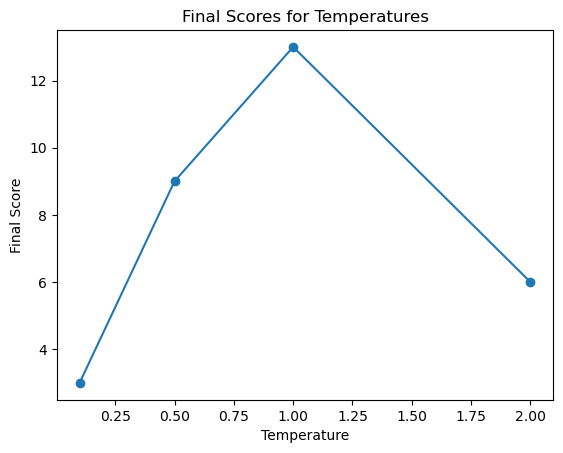

In [83]:
import matplotlib.pyplot as plt

results = evaluate_model_singular(base_model, num_removed, temperatures, experimental_data, threshold, 23)

# Extract final scores for the current seed
final_scores = []
ed = []
for temp in temperatures:
    if results[temp]["history"]:  # Ensure history is not empty
        final_scores.append(results[temp]["history"][-1]['final_score'])
        ed.append(model_edit_distance(base_model, results[temp]['final_model']))
    else:
        print(f"Warning: No history for temperature {temp}")
        final_scores.append(None)  # Placeholder for missing data

# Filter out None values before plotting
filtered_temperatures = [t for t, score in zip(temperatures, final_scores) if score is not None]
filtered_scores = [score for score in final_scores if score is not None]

# Plot final scores for the current seed
plt.figure()
plt.plot(filtered_temperatures, filtered_scores, marker="o")
plt.xlabel("Temperature")
plt.ylabel("Final Score")
plt.title(f"Final Scores for Temperatures")
#plt.savefig(f"final_scores_seed_{seed}.png") 
plt.show()

In [53]:
results[0.1]['history']

[{'reaction': 'Random_Rxn_13',
  'final_score': 19.8096307123356,
  'fit_score': 18.8096307123356,
  'num_evals': 264},
 {'reaction': 'R5',
  'final_score': 32.38076908482351,
  'fit_score': 15.190384542411755,
  'num_evals': 517},
 {'reaction': 'Random_Rxn_18',
  'final_score': 48.57115352659155,
  'fit_score': 15.190384508863849,
  'num_evals': 759},
 {'reaction': 'Random_Rxn_10',
  'final_score': 4.0000002218842505,
  'fit_score': 5.547106267649217e-08,
  'num_evals': 990}]

## Plotting results of reconstructions with different seeds and different numbers of removed reactions

R3
R8
Evaluating num_removed=2, temperature=0.1
2.000000141697168
16
14
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=0.5
2.000000141697168
12
38
36
20
17
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0
2.000000141697168
9
3
33
2
16
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=2.0
2.000000141697168
0
25
12
18
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=5.0
2.000000141697168
2
9
0
9
21
7
9
26
0
1
16
22
0
17
18
1
13
Threshold reached. Reconstruction complete.


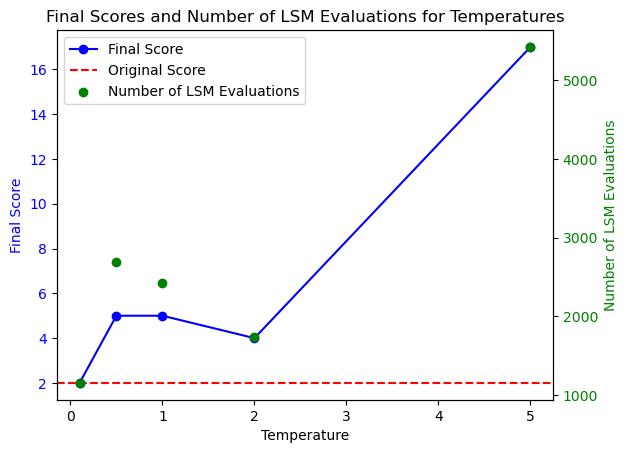

R12
R9
R10
Evaluating num_removed=3, temperature=0.1
3.0000002125457526
50
8
50
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=0.5
3.0000002125457526
47
44
16
21
35
29
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=1.0
3.0000002125457526
31
0
6
1
29
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=2.0
3.0000002125457526
14
19
8
9
0
7
23
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=5.0
3.0000002125457526
6
5
26
0
1
7
19
0
8
2
Threshold reached. Reconstruction complete.


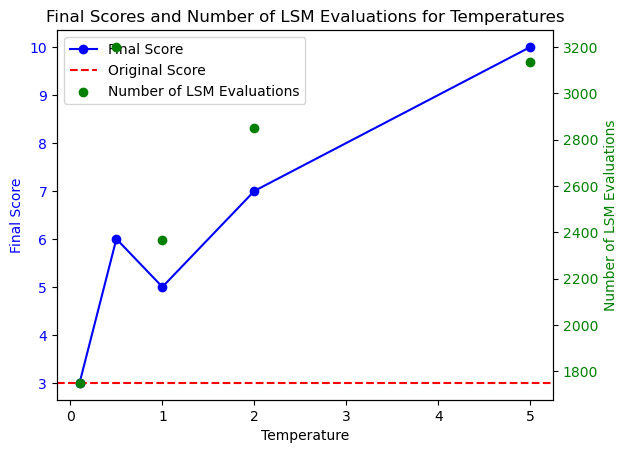

R6
R9
R11
R3
Evaluating num_removed=4, temperature=0.1
4.000000283394336
38
12
38
44
49
26
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=0.5
4.000000283394336
26
31
26
24
2
13
1
37
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=1.0
4.000000283394336
13
25
9
12
0
10
32
8
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=2.0
4.000000283394336
9
15
0
1
15
13
0
18
19
2
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=5.0
4.000000283394336
12
8
7
12
0
1
11
Threshold reached. Reconstruction complete.


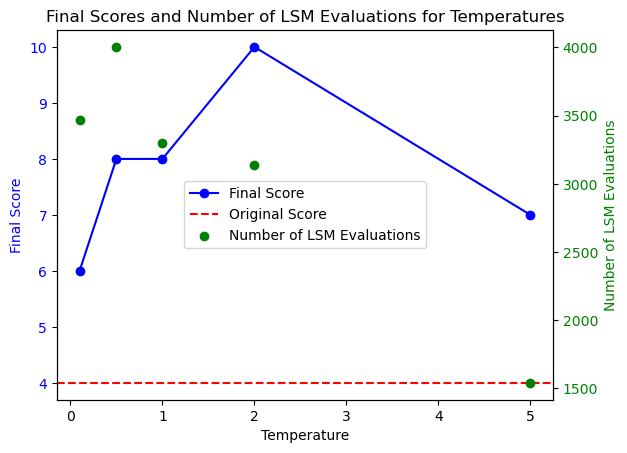

R11
R2
Evaluating num_removed=2, temperature=0.1
2.000000141697168
16
32
11
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=0.5
2.000000141697168
2
24
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0
2.000000141697168
14
18
16
0
13
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=2.0
2.000000141697168
17
3
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=5.0
2.000000141697168
13
34
2
24
20
21
16
9
Threshold reached. Reconstruction complete.


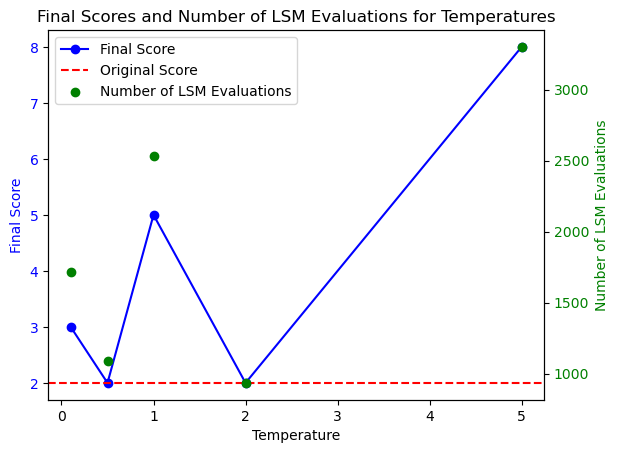

R13
R11
R12
Evaluating num_removed=3, temperature=0.1
3.0000002125457526
5
28
2
1
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=0.5
3.0000002125457526
16
17
35
27
1
12
40
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=1.0
3.0000002125457526
0
14
19
1
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=2.0
3.0000002125457526
8
11
20
15
9
9
17
11
21
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=5.0
3.0000002125457526
4
2
3
1
18
7
4
18
Threshold reached. Reconstruction complete.


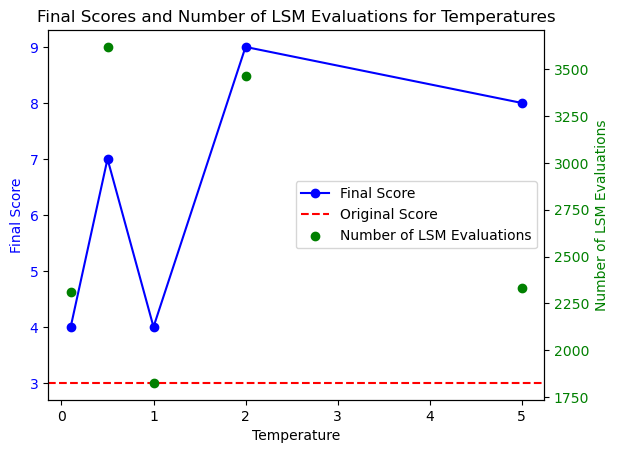

R14
R4
R8
R1
Evaluating num_removed=4, temperature=0.1
4.000000283394336
10
28
32
50
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=0.5
4.000000283394336
19
30
24
18
1
16
42
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=1.0
4.000000283394336
1
36
35
2
22
20
22
16
9
10
18
12
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=2.0
4.000000283394336
10
12
4
4
1
18
6
4
18
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=5.0
4.000000283394336
4
1
10
3
12
2
7
13
11
0
11
Threshold reached. Reconstruction complete.


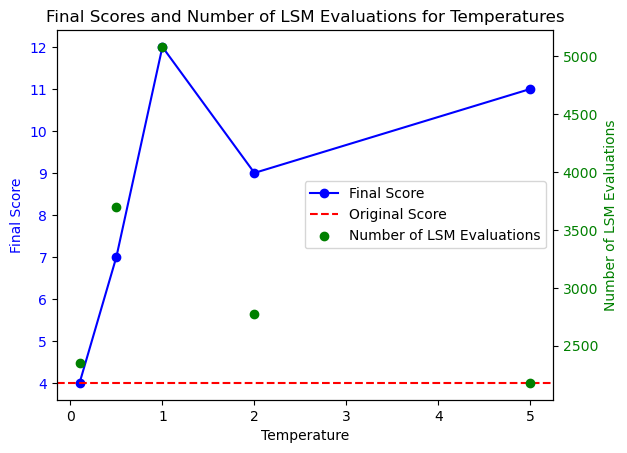

R4
R13
Evaluating num_removed=2, temperature=0.1
2.000000141697168
0
20
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=0.5
2.000000141697168
18
2
7
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0
2.000000141697168
1
15
35
13
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=2.0
2.000000141697168
11
2
35
5
7
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=5.0
2.000000141697168
7
32
27
34
Threshold reached. Reconstruction complete.


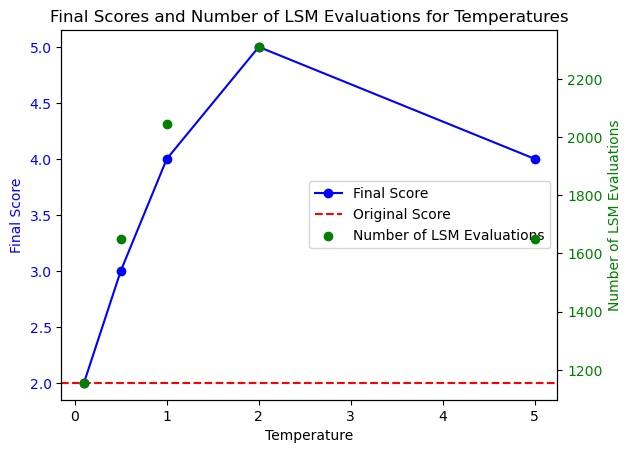

R7
R10
R1
Evaluating num_removed=3, temperature=0.1
3.0000002125457526
0
32
8
1
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=0.5
3.0000002125457526
0
1
9
21
14
22
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=1.0
3.0000002125457526
No valid reactions to consider. Stopping reconstruction.
Evaluating num_removed=3, temperature=2.0
3.0000002125457526
No valid reactions to consider. Stopping reconstruction.
Evaluating num_removed=3, temperature=5.0
3.0000002125457526
No valid reactions to consider. Stopping reconstruction.


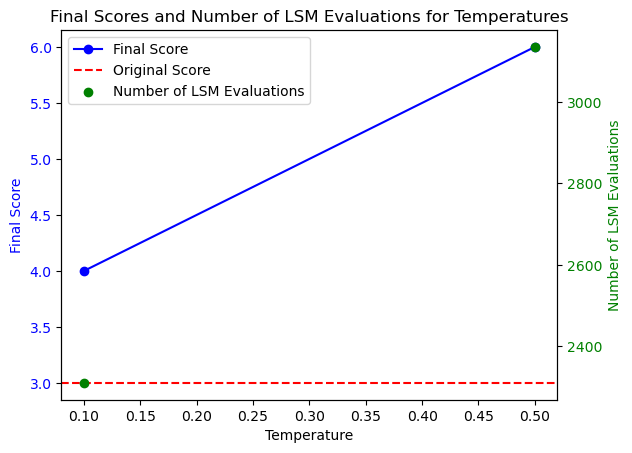

R14
R7
R6
R8
Evaluating num_removed=4, temperature=0.1
4.000000283394336
0
4
14
7
3
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=0.5
4.000000283394336
0
12
20
7
26
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=1.0
4.000000283394336
0
12
4
8
20
34
29
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=2.0
4.000000283394336
2
20
10
13
24
8
26
27
21
14
4
7
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=5.0
4.000000283394336
0
3
5
11
4
16
13
15
4
9
9
5
5
9
6
Threshold reached. Reconstruction complete.


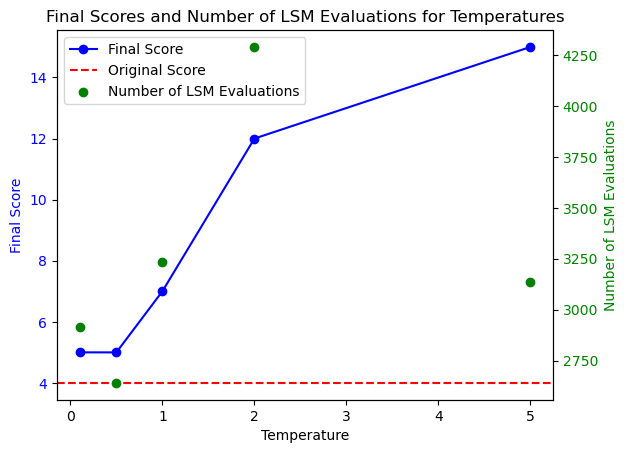

R3
R7
Evaluating num_removed=2, temperature=0.1
2.000000141697168
11
34
33
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=0.5
2.000000141697168
16
3
3
2
39
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0
2.000000141697168
12
28
1
40
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=2.0
2.000000141697168
16
6
6
6
12
19
16
10
19
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=5.0
2.000000141697168
2
4
5
7
13
2
Threshold reached. Reconstruction complete.


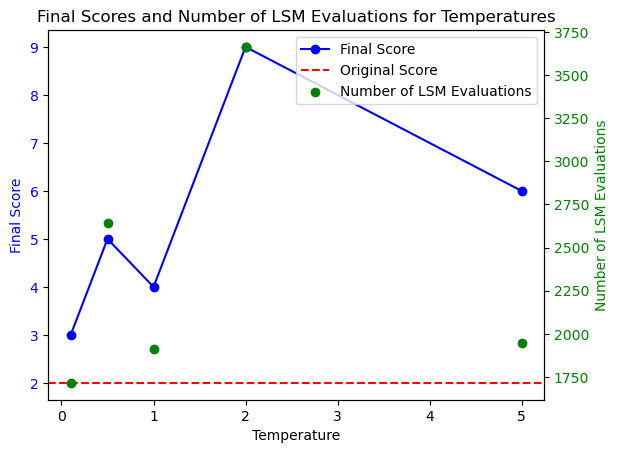

R4
R12
R1
Evaluating num_removed=3, temperature=0.1
3.0000002125457526
4
51
50
32
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=0.5
3.0000002125457526
3
4
1
40
23
26
0
41
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=1.0
3.0000002125457526
17
8
2
3
8
16
15
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=2.0
3.0000002125457526
4
18
3
9
10
13
21
5
13
14
1
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=5.0
3.0000002125457526
6
1
1
18
18
14
5
Threshold reached. Reconstruction complete.


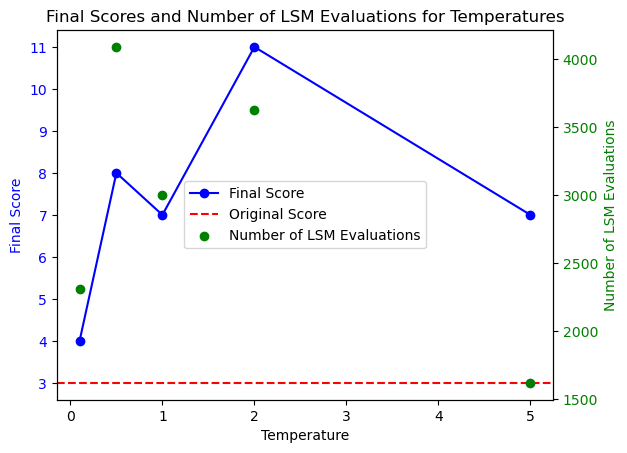

R14
R11
R6
R2
Evaluating num_removed=4, temperature=0.1
4.000000283394336
13
35
28
9
26
9
1
40
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=0.5
4.000000283394336
20
19
0
38
33
6
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=1.0
4.000000283394336
5
6
8
16
12
6
15
4
7
10
12
22
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=2.0
4.000000283394336
4
9
7
0
5
4
1
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=5.0
4.000000283394336
14
19
13
5
1
10
6
Threshold reached. Reconstruction complete.


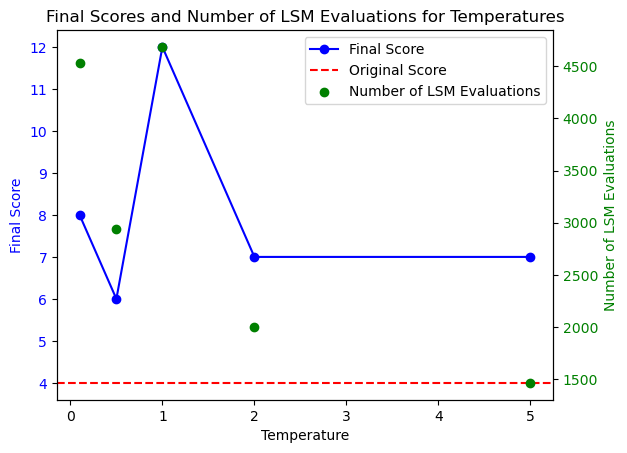

R4
R2
Evaluating num_removed=2, temperature=0.1
2.000000141697168
7
5
14
21
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=0.5
2.000000141697168
0
3
39
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0
2.000000141697168
20
8
19
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=2.0
2.000000141697168
20
6
3
4
7
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=5.0
2.000000141697168
20
14
2
19
6
8
16
Threshold reached. Reconstruction complete.


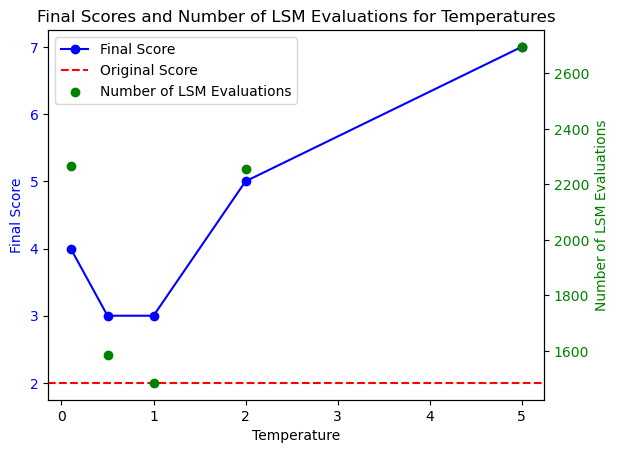

R2
R1
R5
Evaluating num_removed=3, temperature=0.1
3.0000002125457526
17
15
35
37
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=0.5
3.0000002125457526
0
5
45
32
6
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=1.0
3.0000002125457526
16
34
9
8
3
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=2.0
3.0000002125457526
5
36
25
5
27
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=5.0
3.0000002125457526
5
14
30
25
9
Threshold reached. Reconstruction complete.


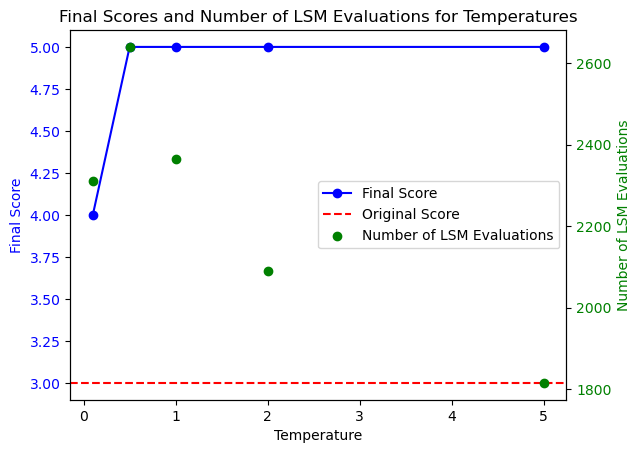

R8
R11
R10
R6
Evaluating num_removed=4, temperature=0.1
4.000000283394336
17
31
8
35
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=0.5
4.000000283394336
0
5
22
28
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=1.0
4.000000283394336
3
19
19
4
5
3
6
18
8
6
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=2.0
4.000000283394336
17
8
12
31
26
11
6
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=5.0
4.000000283394336
6
0
4
7
0
2
7
2
4
0
8
9
Threshold reached. Reconstruction complete.


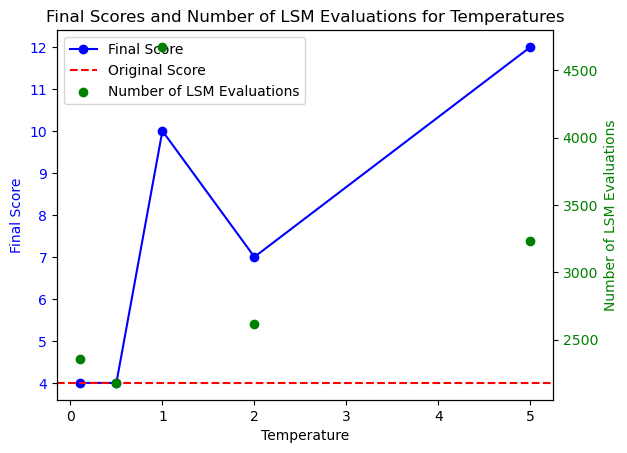

R11
R1
Evaluating num_removed=2, temperature=0.1
2.000000141697168
16
40
32
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=0.5
2.000000141697168
4
4
15
1
20
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0
2.000000141697168
15
12
20
21
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=2.0
2.000000141697168
11
3
11
3
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=5.0
2.000000141697168
8
5
13
1
18
Threshold reached. Reconstruction complete.


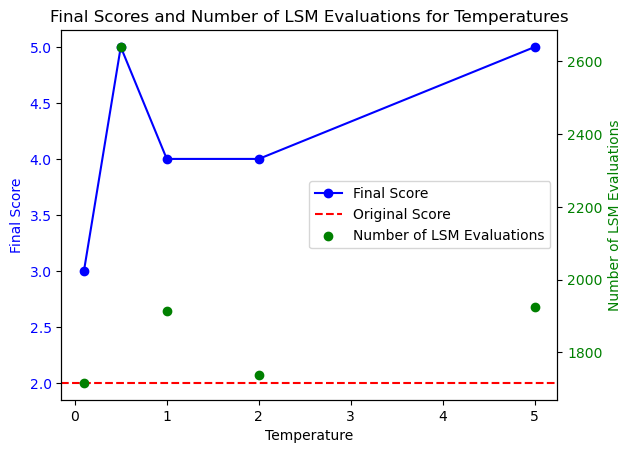

R10
R7
R6
Evaluating num_removed=3, temperature=0.1
3.0000002125457526
10
35
30
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=0.5
3.0000002125457526
2
4
7
0
32
22
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=1.0
3.0000002125457526
10
19
20
15
8
14
5
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=2.0
3.0000002125457526
5
1
3
0
17
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=5.0
3.0000002125457526
2
8
9
3
1
5
3
3
22
17
16
12
Threshold reached. Reconstruction complete.


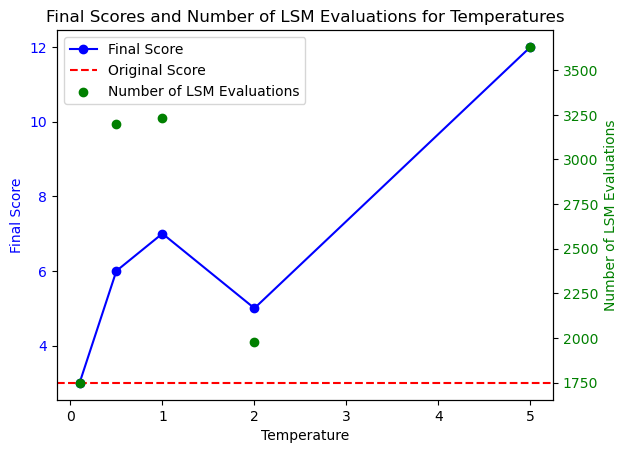

R4
R12
R10
R7
Evaluating num_removed=4, temperature=0.1
4.000000283394336
7
25
12
9
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=0.5
4.000000283394336
2
12
0
31
22
23
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=1.0
4.000000283394336
8
18
7
5
7
3
5
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=2.0
4.000000283394336
2
8
0
10
2
2
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=5.0
4.000000283394336
3
3
0
4
5
9
19
16
15
1
15
15
17
15
1
12
4
3
4
6
6
0
7
2
4
3
0
0
1
0
No valid reactions to consider. Stopping reconstruction.


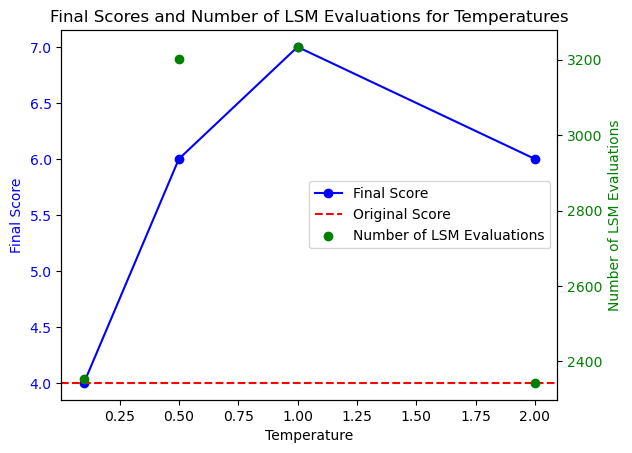

R7
R2
Evaluating num_removed=2, temperature=0.1
2.000000141697168
14
49
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=0.5
2.000000141697168
39
11
20
10
29
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0
2.000000141697168
19
40
37
18
32
1
29
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=2.0
2.000000141697168
0
9
15
32
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=5.0
2.000000141697168
8
7
17
22
Threshold reached. Reconstruction complete.


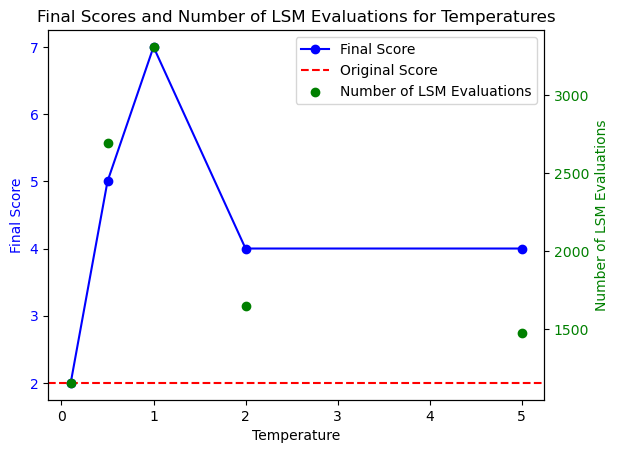

R3
R2
R8
Evaluating num_removed=3, temperature=0.1
3.0000002125457526
1
12
50
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=0.5
3.0000002125457526
1
17
20
35
24
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=1.0
3.0000002125457526
1
24
12
26
1
30
0
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=2.0
3.0000002125457526
0
15
22
6
9
23
Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=5.0
3.0000002125457526
No valid reactions to consider. Stopping reconstruction.


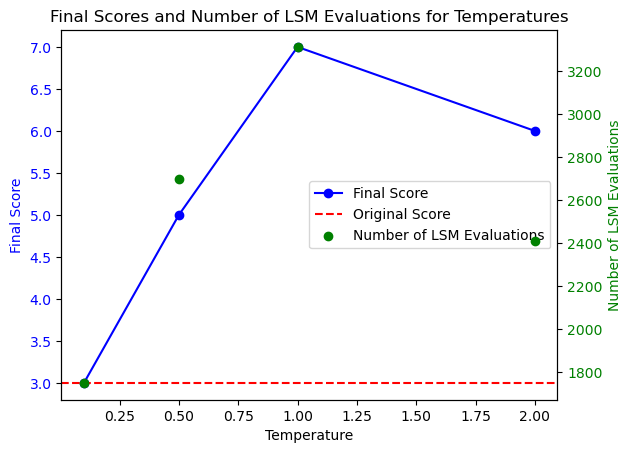

R10
R13
R14
R2
Evaluating num_removed=4, temperature=0.1
4.000000283394336
2
29
31
33
18
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=0.5
4.000000283394336
3
11
20
44
37
18
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=1.0
4.000000283394336
7
1
19
0
11
22
32
11
8
23
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=2.0
4.000000283394336
6
11
3
27
27
7
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=5.0
4.000000283394336
2
3
0
7
21
10
17
1
Threshold reached. Reconstruction complete.


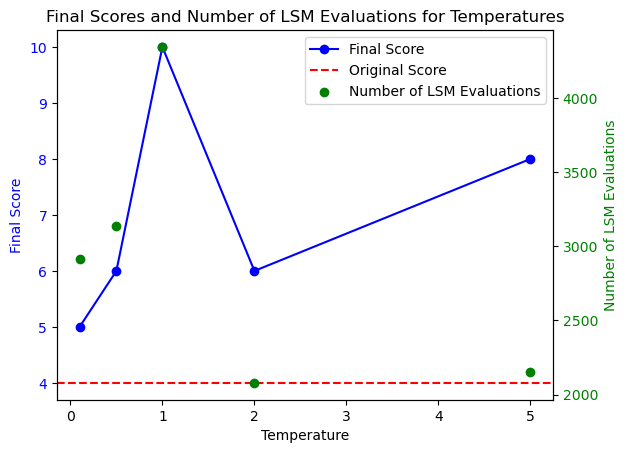

In [94]:
import matplotlib.pyplot as plt

for seed in seeds:
    for num_removed in num_removed_list:
        results = evaluate_model_singular(base_model, num_removed, temperatures, experimental_data, threshold, seed=seed)

        # Extract final scores for the current seed
        final_scores = []
        original_score = None
        num_evals = []
        for temp in temperatures:
            if results[temp]["history"]:  # Ensure history is not empty
                final_scores.append(results[temp]["history"][-1]['final_score'])
                num_evals.append(results[temp]["history"][-1]['num_evals'])
                original_score = results[temp]["original_score"]
                
            else:
                print(f"Warning: No history for temperature {temp}")
                final_scores.append(None)  # Placeholder for missing data
                
        # Filter out None values before plotting
        filtered_temperatures = [t for t, score in zip(temperatures, final_scores) if score is not None]
        filtered_scores = [score for score in final_scores if score is not None]
        filtered_num_evals = [evals for evals, score in zip(num_evals, final_scores) if score is not None]

        # Plot final scores for the current seed
        fig, ax1 = plt.subplots()

        # Primary y-axis: Final scores
        ax1.plot(filtered_temperatures, filtered_scores, marker="o", color="b", label="Final Score")
        ax1.set_xlabel("Temperature")
        ax1.set_ylabel("Final Score", color="b")
        ax1.tick_params(axis='y', labelcolor="b")
        ax1.set_title(f"Final Scores and Number of LSM Evaluations for Temperatures")

        # Add original score as a horizontal line
        if original_score:
            ax1.axhline(y=original_score, color='r', linestyle='--', label="Original Score")

        # Secondary y-axis: Number of evaluations
        ax2 = ax1.twinx()
        ax2.scatter(filtered_temperatures, filtered_num_evals, color="g", label="Number of LSM Evaluations")
        ax2.set_ylabel("Number of LSM Evaluations", color="g")
        ax2.tick_params(axis='y', labelcolor="g")

        # Combine legends from both axes
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="best")

        # Save or display the plot
        #plt.savefig(f"final_scores_seed_{num_removed}_{seed}_DFKI.png")
        plt.show()


Experiment: Removal of different numbers of reactions and reconstruction with different temperature parameters.

In [26]:
# Method to run the workflow for a single model with varying parameters
def evaluate_model(base_model, num_removed_list, temperatures, experimental_data, threshold=3e-7):
    
    results = {}

    for num_removed in num_removed_list:
        for i in range(3):  # Generate three models for each num_removed
            # Create input model and random reaction pool
            original_model = base_model.copy()
            input_model, reaction_list = reduce_model_random(original_model, num_removed)

            for temperature in temperatures:
                print(f"Evaluating num_removed={num_removed}, temperature={temperature}, iteration={i+1}")

                # Run reconstruction
                final_model, history, original_score = reconstruct_model(
                    input_model, original_model, reaction_list, experimental_data, threshold, temperature
                )

                # Save results
                results[(num_removed, temperature, i)] = {
                    "final_model": final_model,
                    "history": history,
                    "original_score": original_score
                }

    return results

In [27]:
num_removed_list = [1, 2, 3, 4]  # Example number of reactions to remove
temperatures = [0.1, 0.5, 1.0, 2.0] 

In [28]:
random.seed(42)
np.random.seed(42)

In [29]:
results42 = evaluate_model(model, num_removed_list, temperatures, experimental_data_zeropadded_out)

R11
Evaluating num_removed=1, temperature=0.1, iteration=1
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=0.5, iteration=1
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=1.0, iteration=1
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=2.0, iteration=1
1.000000070848584
Threshold reached. Reconstruction complete.
R13
Evaluating num_removed=1, temperature=0.1, iteration=2
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=0.5, iteration=2
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=1.0, iteration=2
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=2.0, iteration=2
1.000000070848584
Reaction list is empty. Stopping reconstruction.
R10
Evaluating num_removed=1, temperature=0.1, iter

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Iteration limit reached
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Threshold reached. Reconstruction complete.
Evaluating num_removed=3, temperature=0.5, iteration=3
3.0000002125457526
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in L

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Threshold reached. Reconstruction complete.
Evaluating num_removed=4, temperature=0.5, iteration=1
4.000000283394336
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LS

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

In [30]:
random.seed(17)
np.random.seed(17)

In [31]:
results17 = evaluate_model(model, num_removed_list, temperatures, experimental_data_zeropadded_out)

R9
Evaluating num_removed=1, temperature=0.1, iteration=1
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=0.5, iteration=1
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=1.0, iteration=1
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=2.0, iteration=1
1.000000070848584
Threshold reached. Reconstruction complete.
R7
Evaluating num_removed=1, temperature=0.1, iteration=2
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=0.5, iteration=2
1.000000070848584
Threshold reached. Reconstruction complete.
Evaluating num_removed=1, temperature=1.0, iteration=2
1.000000070848584
Reaction list is empty. Stopping reconstruction.
Evaluating num_removed=1, temperature=2.0, iteration=2
1.000000070848584
Reaction list is empty. Stopping reconstruction.
R7
Evaluating num_removed=1, temperature=0.1, it

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0, iteration=1
2.000000141697168
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LS

2.000000141697168
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschl

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Reaction list is empty. Stopping reconstruction.
R6
R7
Evaluating num_removed=2, temperature=0.1, iteration=3
2.000000141697168
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Threshold reached. Reconstruction complete.
Evaluating num_removed=2, temperature=1.0, iteration=3
2.000000141697168
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints 

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

4.000000283394336
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschl

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

/Users/philipp/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Iteration limit reached
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Iteration limit reached
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem


Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular mat

Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Singular matrix C in LSQ subproblem
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality constraints incompatible
Optimierung fehlgeschlagen: Inequality c

In [32]:
results17[(4, 1.0, 2)]["history"]

[{'reaction': 'Random_Rxn_16',
  'final_score': 1.0,
  'fit_score': 0.0,
  'num_evals': 44},
 {'reaction': 'Random_Rxn_1',
  'final_score': 2.0,
  'fit_score': 0.0,
  'num_evals': 77},
 {'reaction': 'Random_Rxn_9',
  'final_score': 3.0,
  'fit_score': 0.0,
  'num_evals': 99}]

In [33]:
results_list = [results42, results17]

In [34]:
import matplotlib.pyplot as plt

In [35]:
def plot_average_num_evals_multiple(results_list, temperatures):
    
    avg_num_evals = {temp: [] for temp in temperatures}

    for results in results_list:
        for (num_removed, temperature, iteration), result in results.items():
            history = result["history"]
            if history:
                avg_num_evals[temperature].append(history[-1]["num_evals"])

    avg_values = {temp: np.mean(avg_num_evals[temp]) for temp in temperatures}

    plt.figure()
    plt.bar(range(len(avg_values)), avg_values.values(), tick_label=[str(temp) for temp in avg_values.keys()])
    plt.xlabel("Temperature")
    plt.ylabel("Average num_evals")
    plt.title("Average num_evals vs. Temperature (Multiple Results)")
    plt.show()


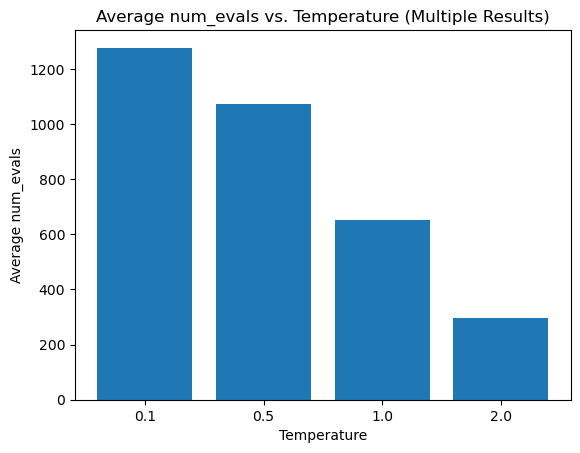

In [36]:
plot_average_num_evals_multiple(results_list, temperatures)

In [37]:
def plot_models_reaching_threshold(results, temperatures, threshold):
    
    models_reaching_threshold = {temp: 0 for temp in temperatures}

    for (num_removed, temperature, iteration), result in results.items():
        history = result["history"]
        if history and history[-1]["fit_score"] < threshold:
            models_reaching_threshold[temperature] += 1

    plt.figure()
    plt.bar(range(len(models_reaching_threshold)), models_reaching_threshold.values(), tick_label=[str(temp) for temp in models_reaching_threshold.keys()])
    plt.xlabel("Temperature")
    plt.ylabel("Number of Models")
    plt.title("Models Reaching Threshold vs. Temperature")
    plt.show()

In [38]:
def plot_models_reaching_threshold_multiple(results_list, temperatures, threshold):
    
    models_reaching_threshold = {temp: 0 for temp in temperatures}

    for results in results_list:
        for (num_removed, temperature, iteration), result in results.items():
            history = result["history"]
            if history and history[-1]["fit_score"] < threshold:
                models_reaching_threshold[temperature] += 1

    plt.figure()
    plt.bar(range(len(models_reaching_threshold)), models_reaching_threshold.values(), tick_label=[str(temp) for temp in models_reaching_threshold.keys()])
    plt.xlabel("Temperature")
    plt.ylabel("Number of Models")
    plt.title("Models Reaching Threshold vs. Temperature (Multiple Results)")
    plt.show()


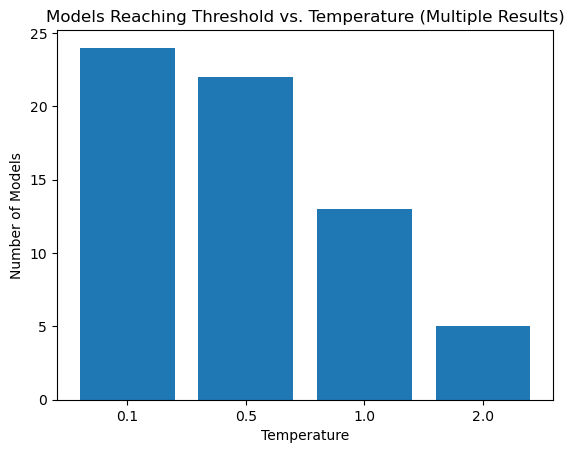

In [39]:
plot_models_reaching_threshold_multiple(results_list, temperatures, threshold)

In [40]:
def plot_final_scores_multiple(results_list, temperatures):
    
    final_scores = {temp: [] for temp in temperatures}

    for results in results_list:
        for (num_removed, temperature, iteration), result in results.items():
            history = result["history"]
            if history:
                final_scores[temperature].append(history[-1]["final_score"])

    plt.figure()
    for temp, scores in final_scores.items():
        plt.scatter([temp] * len(scores), scores, label=f"Temp={temp}")

    plt.xlabel("Temperature")
    plt.ylabel("Final Scores")
    plt.title("Final Scores vs. Temperature")
    plt.legend()
    plt.show()


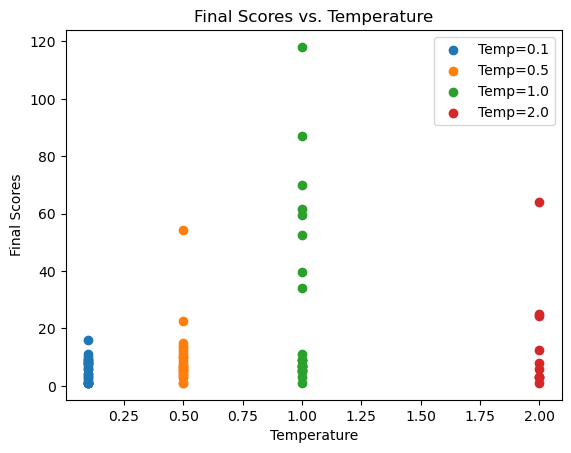

In [41]:
plot_final_scores_multiple(results_list, temperatures)